<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task #1

In [5]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Task #2 generate descriptive statistics and visualizations

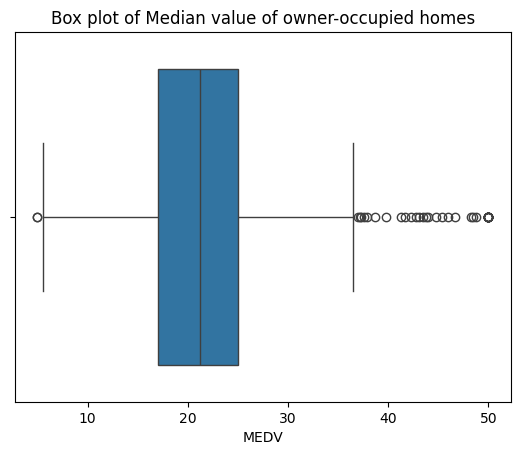

In [15]:
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.title('Box plot of Median value of owner-occupied homes')
plt.show()

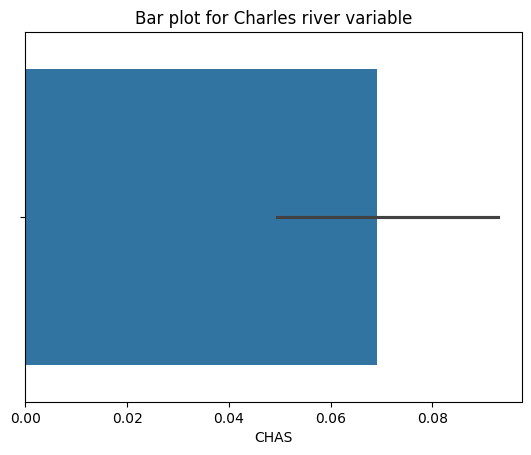

In [14]:
ax = sns.barplot(x="CHAS", data=boston_df)
plt.title('Bar plot for Charles river variable')
plt.show()

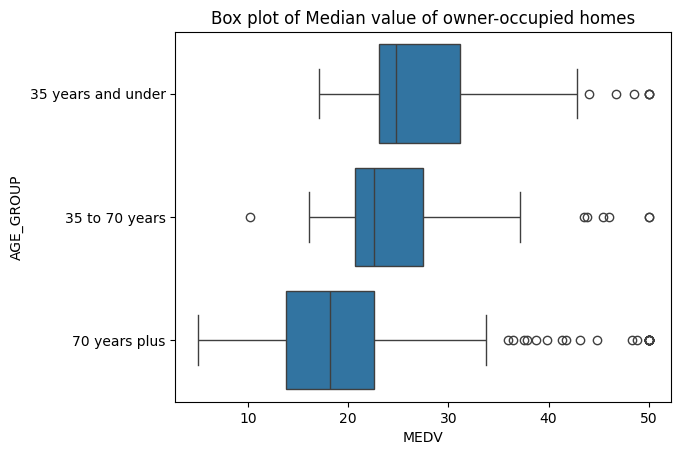

In [21]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins = [-float('inf'), 35, 70, float('inf')], labels = ['35 years and under', '35 to 70 years', '70 years plus'])
ax = sns.boxplot(x='MEDV', y='AGE_GROUP', data=boston_df)
plt.title('Box plot of Median value of owner-occupied homes')
plt.show()

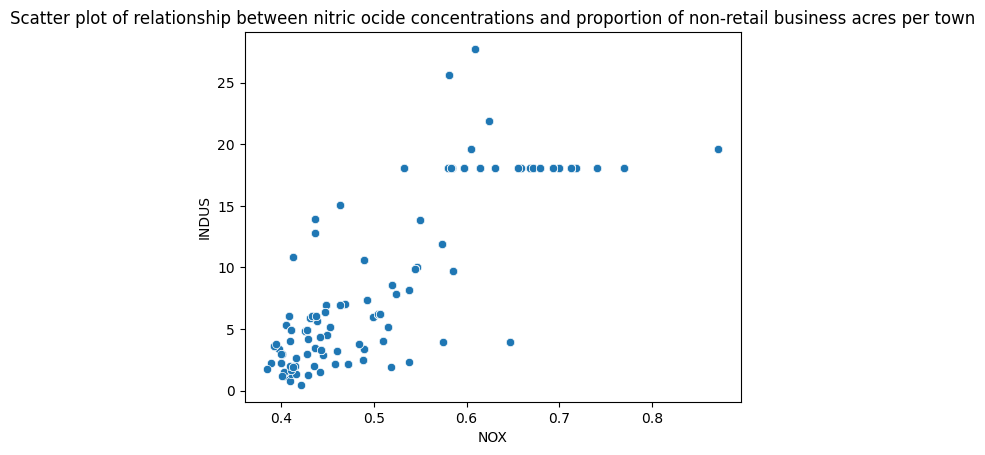

In [22]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter plot of relationship between nitric ocide concentrations and proportion of non-retail business acres per town')
plt.show()
# relationship is positive correlation

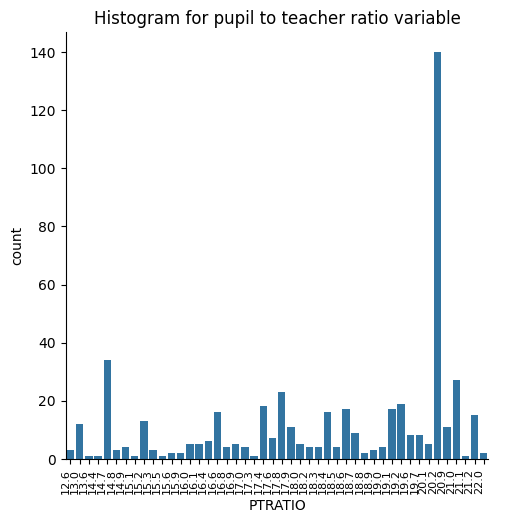

In [31]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
plt.title('Histogram for pupil to teacher ratio variable')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.show()

Task #3 use appropriate tests to answer the questions provided

In [37]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# null hypotheses: there is no difference in median value of houses bounded by the charles river
# assume equal variance
group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
scipy.stats.ttest_ind(group_1, group_0, equal_var=True)
# conclusion: since p value is < 0.05, we can reject the null hypothesis of there not being significant difference in median value of houses bounded by charles river

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [40]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# null hypothesis: there is no difference in median vlaue of houses for each proportion of owner accupied unites prior to 1940
# assume equal variance
f_statistic, p_value = scipy.stats.f_oneway(boston_df['MEDV'], boston_df['AGE'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
# conclusion: since p value is < 0.05, we can reject the null hypothesis of there not being difference in median values of houses and proportion of each owner occupied units built before 1940

F_Statistic: 1223.1740271875933, P-Value: 3.20946197250671e-176


In [41]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# null hypothsis: there is no relationship
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
# conclusion: since p value is < 0.05, we can reject the null hypothesis of there being no relationship

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [42]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# null hypothsis: there is no impact

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# conclusion: since p value is < 0.5, we can reject the null hypothesis of there being no impact

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        16:37:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""